In [7]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import warnings
import scipy

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data

In [2]:
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    maximum_merger_ratio_30kpc_current_fraction = f['maximum_merger_ratio_30kpc_current_fraction'][:]
    lam = f['lam'][:]
    bulge_ratio = f['bulge_ratio'][:]

In [3]:
warnings.filterwarnings('ignore')

PSB_selection = (median_age<=1.2)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
intermediate_quiescent_selection = (median_age>1.2)&(median_age<=1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
old_quiescent_selection = (median_age>1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
starforming_selection = np.where(np.log10(newbin_current_SFR/10**(total_mass))>-10.5)[0]

In [4]:
#data for seeded 80 random star-forming galaxies
np.random.seed(0)
subselection = np.random.choice(starforming_selection, 80, replace=False)

Lambda vs Mass and Bulge Ratio vs Mass

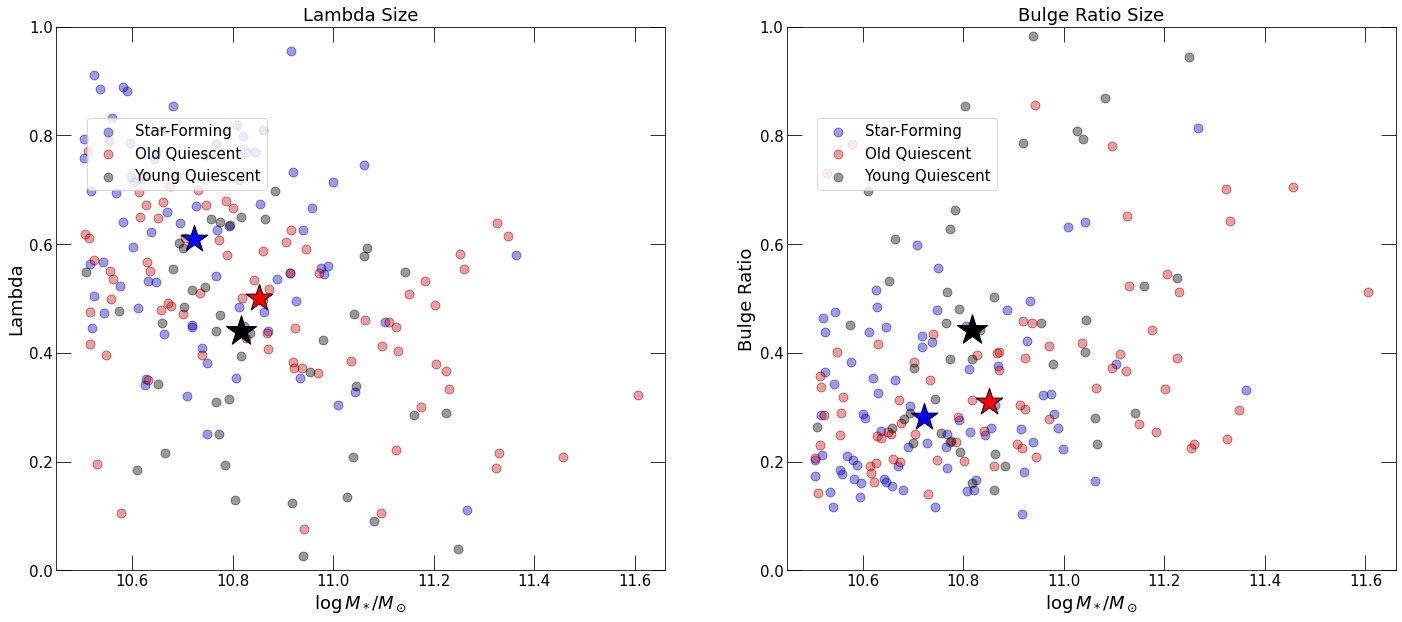

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')

ax1.scatter(total_mass[subselection], lam[subselection], c='blue', s=80, alpha = 0.4, edgecolors='k', label='Star-Forming')
ax1.scatter((total_mass[old_quiescent_selection]), lam[old_quiescent_selection], c='red', s=80, alpha = 0.4, edgecolors='k', label='Old Quiescent')
ax1.scatter((total_mass[PSB_selection]), lam[PSB_selection], c='k', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent')
ax1.scatter(np.median(total_mass[subselection]), np.median(lam[subselection]), c='blue', edgecolors='k', s=800, marker='*', lw=1)
ax1.scatter(np.median(total_mass[old_quiescent_selection]), np.median(lam[old_quiescent_selection]), c='red', edgecolors='k', s=800, marker='*', lw=1)
ax1.scatter(np.median(total_mass[PSB_selection]), np.median(lam[PSB_selection]), c='black', s=1000, edgecolors='black', marker='*', lw=1)
ax1.legend(loc=(0.05, 0.7), fontsize=15, frameon=True)
ax1.set_ylim(0, 1)
#ax1.set_xlim(10.45, 11.7)
ax1.set_xlabel('$\log \, M_*/M_\odot$', fontsize=18)
ax1.set_ylabel('Lambda', fontsize=18)
ax1.set_yscale('linear')
ax1.set_title('Lambda Size', fontsize=18)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)


ax2.scatter(total_mass[subselection], bulge_ratio[subselection], c='blue', s=80, alpha = 0.4, edgecolors='k', label='Star-Forming')
ax2.scatter((total_mass[old_quiescent_selection]), bulge_ratio[old_quiescent_selection], c='red', s=80, alpha = 0.4, edgecolors='k', label='Old Quiescent')
ax2.scatter((total_mass[PSB_selection]), bulge_ratio[PSB_selection], c='k', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent')
ax2.scatter(np.median(total_mass[subselection]), np.median(bulge_ratio[subselection]), c='blue', edgecolors='k', s=800, marker='*', lw=1)
ax2.scatter(np.median(total_mass[old_quiescent_selection]), np.median(bulge_ratio[old_quiescent_selection]), c='red', edgecolors='k', s=800, marker='*', lw=1)
ax2.scatter(np.median(total_mass[PSB_selection]), np.median(bulge_ratio[PSB_selection]), c='black', s=1000, edgecolors='black', marker='*', lw=1)
ax2.legend(loc=(0.05, 0.7), fontsize=15, frameon=True)
ax2.set_ylim(0, 1)
#ax2.set_xlim(10.45, 11.7)
ax2.set_xlabel('$\log \, M_*/M_\odot$', fontsize=18)
ax2.set_ylabel('Bulge Ratio', fontsize=18)
ax2.set_yscale('linear')
ax2.set_title('Bulge Ratio Size', fontsize=18)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=7)
ax2.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)

Merger vs Nonmerger for Lambda vs Mass

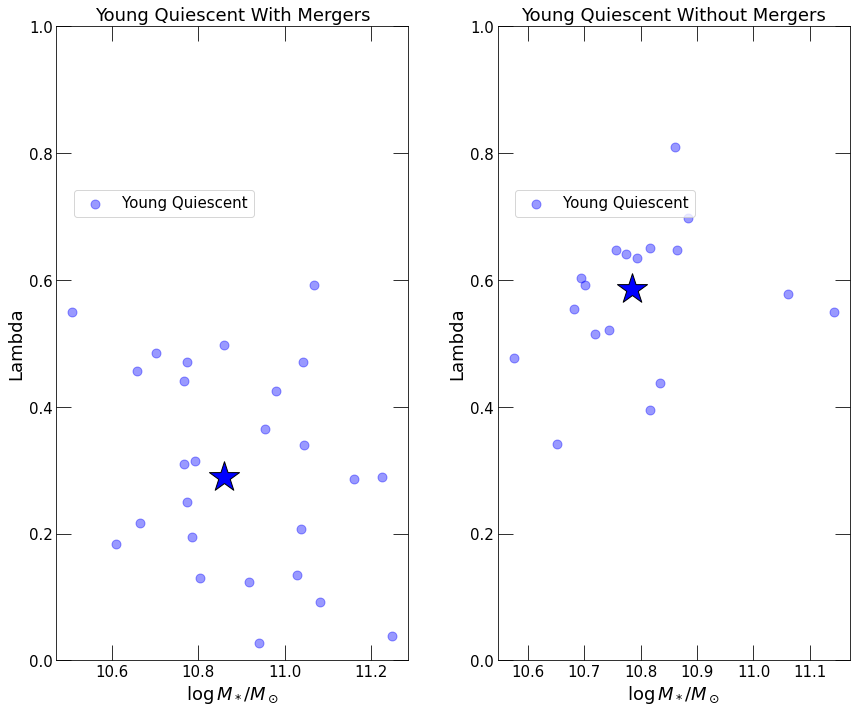

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(12, 10))
f.set_facecolor('w')
n_bins=50
redshift=2

#select young quiescent galaxies by merger cut-off
# had a significant prior merger 
PSB = (maximum_merger_ratio_30kpc_current_fraction>=0.1) & PSB_selection 
# had no significant prior merger
PSBm = (maximum_merger_ratio_30kpc_current_fraction<0.1) & PSB_selection 

#panel 1: young quiescent galaxies with mergers
#ax1.scatter(total_mass[subselection], lam[subselection], c='blue', s=80, alpha = 0.4, edgecolors='k', label='Star-Forming')
#ax1.scatter((total_mass[old_quiescent_selection]), lam[old_quiescent_selection], c='red', s=80, alpha = 0.4, edgecolors='k', label='Old Quiescent')
ax1.scatter((total_mass[PSB]), lam[PSB], c='b', s=80, alpha=0.4, edgecolors='b', label='Young Quiescent')
#ax1.scatter(np.median(total_mass[subselection]), np.median(lam[subselection]), c='blue', edgecolors='k', s=800, marker='*', lw=1)
#ax1.scatter(np.median(total_mass[old_quiescent_selection]), np.median(lam[old_quiescent_selection]), c='red', edgecolors='k', s=800, marker='*', lw=1)
ax1.scatter(np.median(total_mass[PSB]), np.median(lam[PSB]), c='blue', s=1000, edgecolors='black', marker='*', lw=1)
ax1.legend(loc=(0.05, 0.7), fontsize=15, frameon=True)
ax1.set_ylim(0, 1)
#ax1.set_xlim(10.45, 11.7)
ax1.set_xlabel('$\log \, M_*/M_\odot$', fontsize=18)
ax1.set_ylabel('Lambda', fontsize=18)
ax1.set_yscale('linear')
ax1.set_title('Young Quiescent With Mergers', fontsize=18)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)

#panel 2: young quiescent galaxies without mergers
#ax2.scatter(total_mass[subselection], lam[subselection], c='blue', s=80, alpha = 0.4, edgecolors='k', label='Star-Forming')
#ax2.scatter((total_mass[old_quiescent_selection]), lam[old_quiescent_selection], c='red', s=80, alpha = 0.4, edgecolors='k', label='Old Quiescent')
ax2.scatter((total_mass[PSBm]), lam[PSBm], c='b', s=80, alpha=0.4, edgecolors='b', label='Young Quiescent')
#ax2.scatter(np.median(total_mass[subselection]), np.median(lam[subselection]), c='blue', edgecolors='k', s=800, marker='*', lw=1)
#ax2.scatter(np.median(total_mass[old_quiescent_selection]), np.median(lam[old_quiescent_selection]), c='red', edgecolors='k', s=800, marker='*', lw=1)
ax2.scatter(np.median(total_mass[PSBm]), np.median(lam[PSBm]), c='blue', s=1000, edgecolors='black', marker='*', lw=1)
ax2.legend(loc=(0.05, 0.7), fontsize=15, frameon=True)
ax2.set_ylim(0, 1)
ax2.set_xlabel('$\log \, M_*/M_\odot$', fontsize=18)
ax2.set_ylabel('Lambda', fontsize=18)
ax2.set_yscale('linear')
ax2.set_title('Young Quiescent Without Mergers', fontsize=18)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=7)
ax2.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)

f.tight_layout(w_pad=4, h_pad=10)